## Word_embedding

In [ ]:
# 3.ders
# Kelimeler arasındaki anlamsal ilişkileri gösteren vektörlere wordembedding denir
# Elimizdeki wordlerin sayısal vektöre dönüştürülmesi konusunda genelde Word_embedding kullanılıyor(Diğer yöntemlerin handicapları var)

In [ ]:
# Eğer 2 tokenin birlikte sık kullanıldıklarını görürse bunu yakalıyor word_embbeding
# Yani mesela deep ve learning 2 farklı kelime olsa bil bu 2 sini birlikte çok görürse buna anlamsal ilişki yüklüyor
# .. ve bu yapıyı öğreniyor.anlamsal ilişkiyi yakalıyor derken tokenlerin sıklıkla birbirleri ile kullanımlarını kastediyoruz

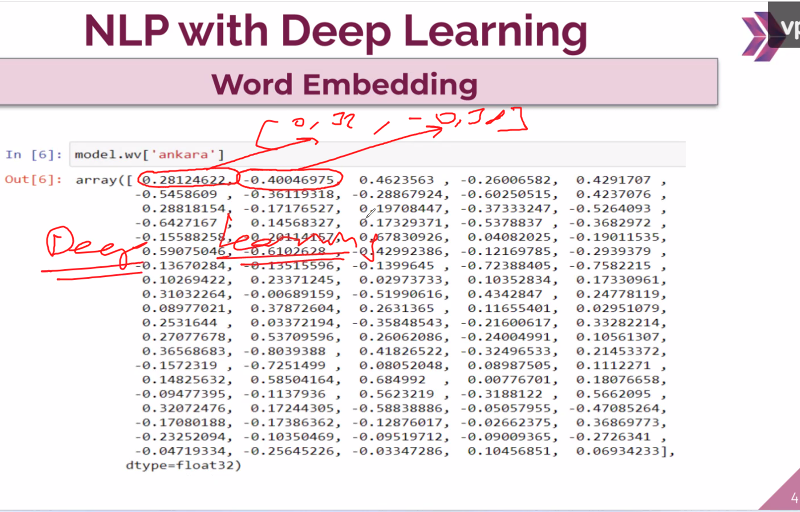

In [ ]:
# Corpus um olsun ve altı tane cümle olsun: 
# öğretmen öğrenciye okulda not verdi
# öğretmen talebeye not verdi
# öğretmen öğrenciye okulda ödev verdi
# eğitmen talebeye üniversitede not verdi
# eğitmen talebeye üniversitede proje yaptı
# eğitmen talebeye üniversitede ödev verdi

# burada geçen unique tokenleri bulalım : öğretmen, öğrenciye, okuldu, "not verme"(Bunu birlikte alalım anlamsal ilişkiyi kaybetmemek adına),
# "proje yapmak", "ödev vermek", eğitmen, talebeye, üniversitede
# 9 tane unique token var.
# Bunların arasındaki feature representation ne olabilir. (Yani bu 9 tane tokeni ortak bir şekilde temsil eden)
# .. Eğitim olabilir, öğretim olabilir

# Eğitim den öğretmenden aldığı im feature representation -->0.95
# Eğitim den eğitmen aldığı im feature representation  --> 0.91
# Öğretim in öğretmenden aldığı im feature representation -- 0.9
# Öğretim in eğitmen aldığı im feature representation  --> 0.88

# Şimdi burada word embedding diyor ki 0.95 ile 0.91 ya da 0.9 ile 0.88 birbirine yakın olduğu için
# öğretmen ve eğitmen arasındaki feature representation(1-2 tane olabilir) arasında anlamsal ilişkiler kuruyor
# .. yani anlamsal olarak birbirlerine yakın olduğun anlıyor(öğretmen ve eğitmenin)
# Bu anlamsal ilişkileri cosinus similarity ile belirliyoruz. cosinus similarity 1 ise anlamsal olarak yakınlar
# .. 0 a yaklaştıkça düşer

# class chat soru: Feature sayısı da otomatik belirleniyor öyle mi Hocam? Word embedding de
# Johnson H: Genelde 50, 100 ve 300 dür

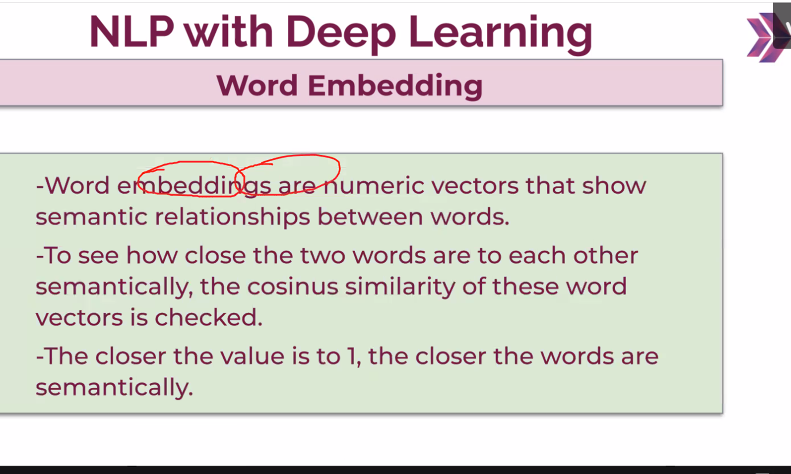

In [ ]:
# datamdan 6 tane tokeni alalım
"""
Gender: Man   = -1   Demekki gender ile %100 ilişkili bu iki kelime ama birbirlerinin tam zıttı
         Woman =  1
# Bir kişiye kadın veya erkek diyebilmem için "gender" feature ına ihtiyacı var. O yüzden 1 ve -1 demiş

        King   = -0.95  Model, King-Queen'in anlamsal olarak birbirine yakın olduğunu fakat gender özelliği üzerinden de birbirlerinin zıttı
        Queen  = 0.07   .. olduğunu anlamış
# FEATURE REPRESENTATION açıklaması: King ve queen arasındaki anlamsal ilişkiyi gender feature representation ı üzerinden çok güzel bir şekilde kurmuş!!!

        Apple  = 0.00  Model, bunların gender ile bir ilgisi olmadığını anlamış
        Orange = 0.01
# King ve Queen üzerindeki ilişkiyi gender, royal, age i kullanarak belirledik(3 tanesini kullandık)

Royal: Man   = 0.01    Model, bunların royal ile bir ilgisi olmadığını anlamış
       Woman = 0.02

       King   = 0.93  Model, King-Queen'in kraliyetle direk ikişili olduğunu anlamış bu yüzden
        Queen  = 0.95  .. zıt işaretler yok

.......

Age:   King = 0.7     King-Queen olabilmek için belli bir yaşa gelmek gerekir. Bu yüzden age ile
       Queen = 0.69   .. güçlü bir ilişki var. Erkek veya bayan olmanızla yaşın bir etkisi yok

.....

Food:  Apple = 0.95, 
        Orange = 0.97 

# SONUÇ: 
# man ve woman üzerindeki ilişkiyi gender ı kullanarak belirledik(1 tanesini kullandık)
# King ve Queen üzerindeki ilişkiyi gender, royal, age i kullanarak belirledik(3 tanesini kullandık)
# man ve woman birbirlerinin yerine kullanılabilir, ya da sıklıkla birlikte kullanılabilir(Anlamsal olarak birbirlerine yakın olduklarından değil, anlamsal ilişkileri olduğu için)
"""
# Modelimiz feature representation ları arka planda belirliyor

# class chat soru: Hocam bu değerler corpustaki bütün tokenlerin birbiri ile cosinus similarity değerleri değil mi?
# Johnson: Hayır hocam. Bu(alttaki tablodaki) değerlerin cosinus similarty ile aldığımız değerler ile alakası yok
# .. cosinüs similartiy uzaydaki vektörler arasındaki açıya bakarak bir sonuç çıkartacak

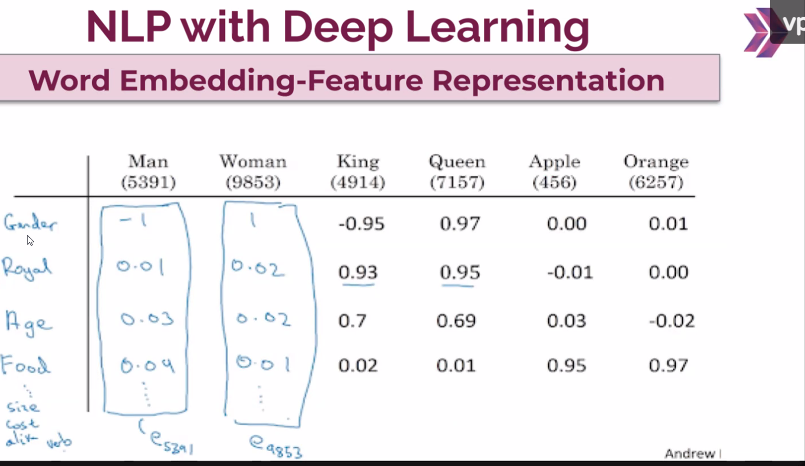

In [ ]:
# Elde ettiğimiz vektörleri uzayda görselleştirdimiz zaman
# cat ve kitten ın genelde aynı tokenlerle kullanıldığını bilmiş. Yani bunlar anlamsal olarak birbirine daha yakın
# cat ve dog un feature representation ı hayvandır, evcil olması, canlı olması olabilir. Bunlar arasında da bir anlamsal ilişki kurabilir(uzayda yakın olurlar)
# cat ile house arasında mesafe daha yüksek cat ve dog a göre. Yani cat ve dog arasında daha yüksek bir anlamsal ilişki kurmuş
# House a atadığı yüksek anlamda cat ve dog un evde yaşamasından dolayı bunlarla bir anlamsal ilişki kurmuş(düşük düzeyde)

# Man in woman ile olan anlamsal ilişkisi, King ile queen arasında olan anlamsal ilişkiye göre daha yakın
# .. yani man ile woman arasındaki anlamsal ilişkisi daha yüksek.
# .. Ancak dikkat edersek man king e daha yakın(Çünkü 2 side erkek) ve woman queen e daha yakın(Çünkü 2 side kadın)

# Buradaki anlamsal ilişkiler ile ilgili bilmemiz gereken;
# 1.Anlamsal ilişkiler DERKEN sözlükdeki anlamsal ilişkileri DEĞİL, birbirleriyle kullanım durumlarına göre olan durumu kastediyoruz
# 2.Anlamsal ilişkiler birbirlerine yakın olan tokenler ile daha yüksek

# NOT: BERT modelleri hariç diğer modellerde birbirlerine yakın olan tokenlerin anlamsal ilişkileri daha yakın

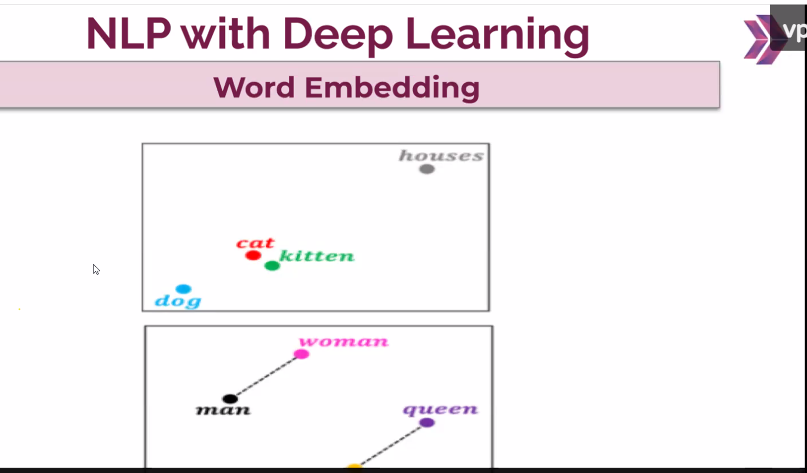

In [ ]:
"""
Mesela bütün feature'lar 100 boyutlu olsun.  Man ve Woman 100 boyutlu vektörleri şu vektörlerle temsil edilsin.
.. (PCA'de birçok feature'ı .. temsil eden bir bileşen gibi)
.. Alttaki 2 vektör arasındaki açı 10 derece olsun

  Man     Woman
   |     /
   |    /
   |   /
   |  /
   | /
   |/

Bu açının cosinüs ü alınır. Cos10.
Benzerlik belirlenirken arka planda cosinus similarity işlemi yapılır. aradaki açı ne kadar dar
.. ise anlamsal olarak birbirlerine o kadar yakınlar demektir. Aradaki açı 0 ise bu iki kelime
.. AYNI kelime demektir
"""

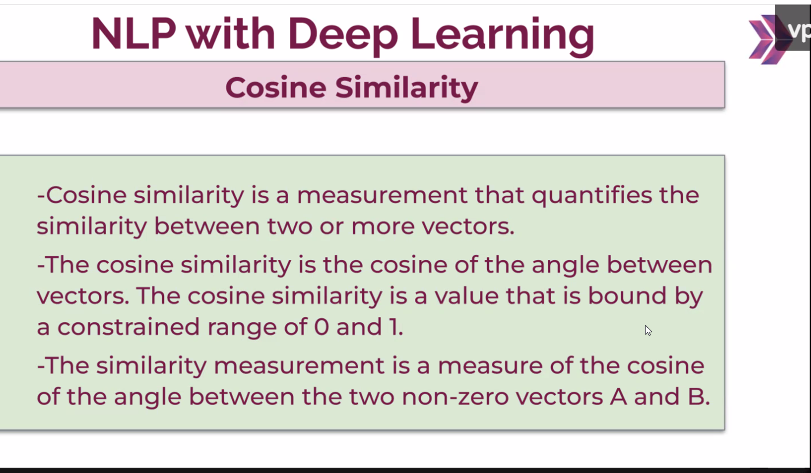

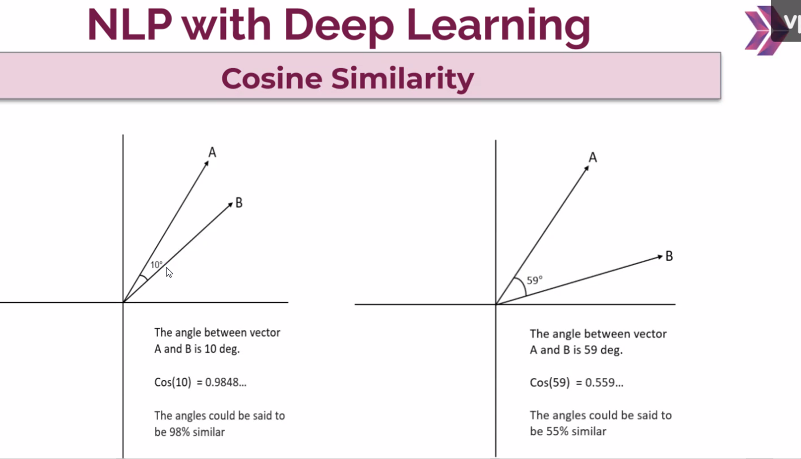

In [ ]:
# Bir çok wordembedding var aslında. Biz Word2Vec ve Glove üzerinden bir şeyler yapacağız
# Word2Vec içinde 2 farklı algoritma var
# Glove aslında Word2Vec alyapısını kullanıyor. Biraz daha farklı

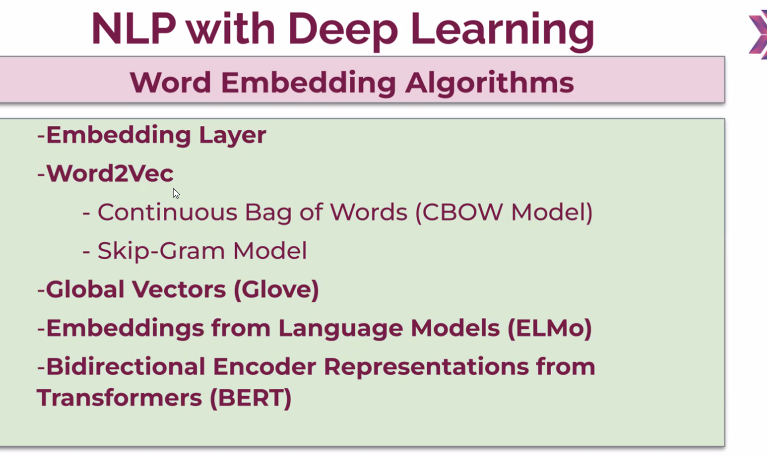

In [ ]:
# Word2Vec altındaki 2 algoritmanın çalışma mantığı ne
# Grammer yapısındaki kalıpları öğrenmeye çalışır
# Kırmızı spor araba trafik kazasına karıştı
# 

# Skip-gram
# Örnek cümle: Kırmızı spor araba trafik kazasına karıştı
# orta kelimeyi verdiğimde sağındaki solundaki kelimeleri öğrenmeye çalışıyor(grammerde kullandığım kalıpları öğreniyor)
# windows_size=2 : Sağımda ve solumdaki kaç tokeni dikkate alarak anlamsal ilişki kurayım
# .. Orta kelime olarak "kırmızı" için w(t-2):boş, w(t-1):boş , w(t+1): spor, w(t+2) : araba olacak
# .. Orta kelime olarak "spor" için w(t-2):boş, w(t-1):kırmızı , w(t+1): araba, w(t+2) : trafik olacak
# Model bunları öğreniyor. # Class chat soru: token patternlerini öğreniyor diyebilir miyiz? # Johnson H: Evet
# Daha büyük pattern leri öğrenmesini istiyorsanız modeli windows_size arttırılır(Genelde 5 veya 10 verilir)
# Daha küçük datalarda tercih edilir

# CBOW
# Örnek cümle: Kırmızı spor araba trafik kazasına karıştı
# windows_size=2 için;
# Kenar kelimeleri verip orta kelimeyi öğrenmeye çalışıyor(grammerde kullandığım kalıpları öğreniyor)
# w(t-2):Kırmızı, w(t-1):Araba,w(t+1):trafik,w(t+2):Kaza olursa, orta kelime trafik olabilir, araba olabilir vs diye
# .. anlamsal ilişkiler kurar
# Daha büyük datalarda tercih edilir

# NOT: windows_size ı arttırsanız bile yine de birbirine yakın olan kelimelere daha çok ağırlık verecektir model


# Class chat: CBOW: Bir bağlam verildiğinde ona en uygun sözcüğü bulma. Skip-gram: Bir kelime verildiğinde bağlamını bulma
# Johnson H: Aslında aynı şeyleri yapıyorlar

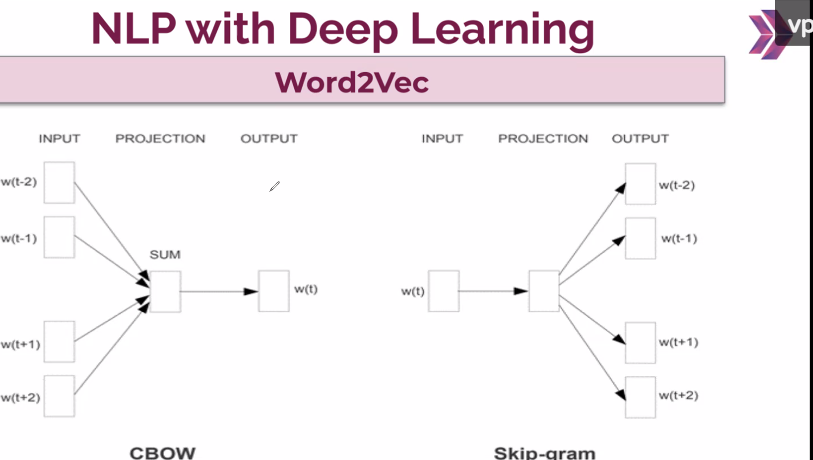

In [ ]:
# windows_size=2
# the nın quick ve the nın brown arasındaki ilişkileri kurup ve kalıpları öğreniyor(training de)
# .. anlamsal ilişkileri tokenlerin birbirleriyle sıklıkla kulanımlarımlarına göre kuruyordu
# .. örneğin quick ile the sıklıkla birlikte kullanılmıyorsa anlamsal ilişkileri düşük olacak
# .. örneğin quick ile brown sıklıkla birlikte kullanılıyorsa anlamsal ilişkileri yüksek olacak

# Glove(2014-stanford üni) : Word2Vec(google tarafından piyasaya sürüldü) de the ve quick 1 defa kullanıldı diyor ve  feature representation ı 
# .. güncelledi sonra başka bir yerde görünce tekrar
# .. feature representation ını güncelliyor ve bunu 1000 defa görürse 1000 defa güncelliyor
# .. glove, the ve quick datada kaç defa kullanılmış not alıyor, sonra diğer iki kelimeye bakıyor onların sayısını
# .. tutuyor(bu istatistiği tutuyor) sonra güncellemeyi tek seferde yapıyor. Bu yüzden glove biraz daha kullanışlıdır



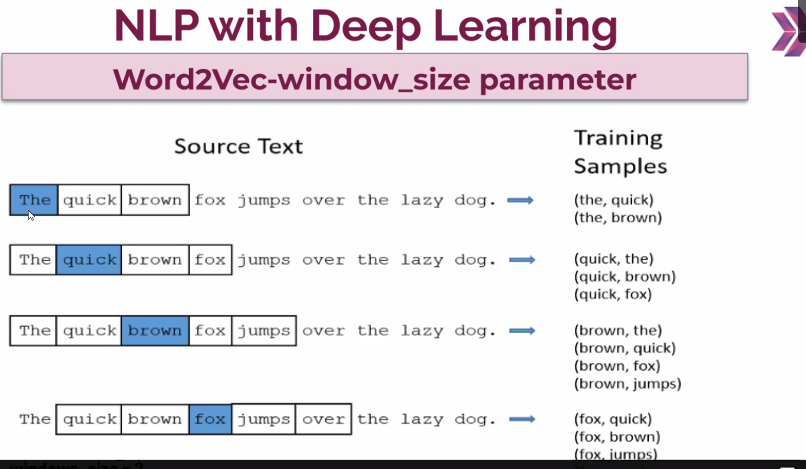

In [ ]:
# Glove ve word2vec sesteş leri tespit etmekte iyi değil. Yani tek taraflı çalışıyorlar
# ELMO ve BERT
# ilk cümlede Soldan sağa doğru model gider ve elmayı sevdiğimi görür sonra bir de sağdan sola gelerek derki
# .. bu marketten aldığımız elma
# Alttaki cümledede soldan sağa gider ve sağdan sola gider bu yediğimiz elmamı der sonra bakar bu o değil der
# .. ve bu 1. cümledeki the apple ile 2. the apple a farklı davranır. Glove ve word2vec bunlara aynı token muameleyi yapar

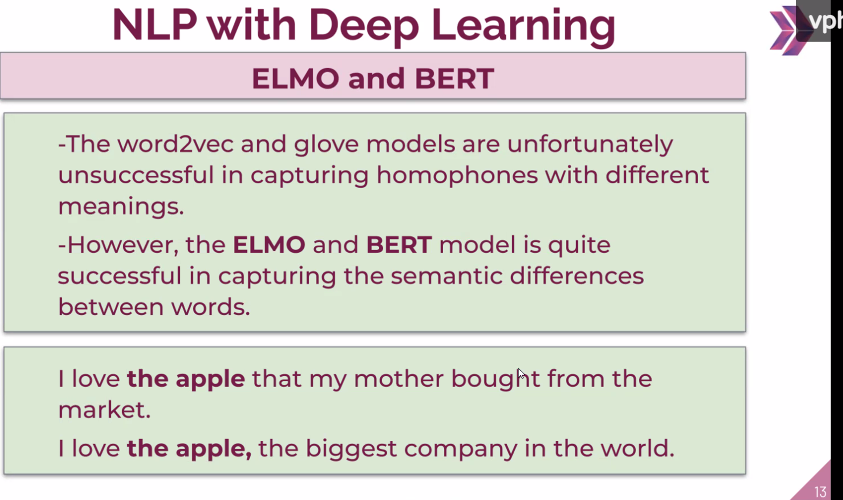

In [ ]:
# 15.10.2022 ders sonu

In [ ]:
# 17.10.2022

In [ ]:
# WordEmbedding ten daha advance bir yöntemimiz yok(Sayısala dönüştürme metodları arasında)
# WordEmbbedding grammer yapısındaki patternleri öğreniyordu. Hangi tokenden sonra hangi token gelir
# .. bunları öğrenerek bizim konuştuğumuz textten anlamlar çıkarabiliyordu

## Word2Vec

In [1]:
# pip install gensim  # Anaconda kullanılmıyorsa bu indirilmeli

In [1]:
import warnings
warnings.filterwarnings("ignore")
from gensim.models import Word2Vec

In [2]:
# Zipfile daki dosyayı okutma yöntemi
import zipfile
text = zipfile.ZipFile('newspaper.zip') # 'newspaper.zip': zip dosyamızın ismi
text = text.read('newspaper.txt')       # 'newspaper.txt': zip dosyasının içindeki dosya
text = text.decode('utf-8')             # Türkçe karakterleri okuyabilmesi için 'utf-8' kullanıyoruz
# .. Çok fazla türkçe karakter olduğu için bunu yazmalıyız

text[:1000]
# Word2vec arkada bir RNN işlemi kullandığı için Cleaning
# DL modellerinde tokenization ve lower kesin olmalıydı, diğer adımlar gerekmiyordu cleaningte
# ML de tüm adımlar yapılmalı

# Gazetelerden alinmis 400.000 cümleden olusan, cleaning islemi tamamlanmis bir datasetimiz var.
# Sadece tokenlerine ayıracağız bunu

# Word2vec de;
# 1.Datayı 2 boyutlu istiyor.
# 2.Her bir cümlem tokenlerine ayrılmış şekilde ve liste içerisinde olmalı

'iran devlet televizyonu ülkedeki eyaletin sinde yapılan reformcuları protesto amaçlı yürüyüşlere milyonlarca kişinin katıldığını bildirdi \ngösterilerde fitnecilere ölüm münafıklara ölüm abd ye ölüm ingiltere ye ölüm sloganları atıldı \ndini lider ali hamaney ve cumhurbaşkanı mahmud ahmedinejad ı destekleyen iranlılar son olaylarda yeğeni öldürülen mir hüseyin musevi başta olmak üzere muhalefet liderlerini kınadılar \nmusevi ye ölüm ve idam idam sloganları duyuldu \nmuhalefet liderleri kaçtı mı aşure günü yaşanan çatışmalarda devlet kaynaklarına göre u terörist olmak üzere kişi ölmüştü \nden fazla kişinin yaralandığı olaylar sırasında en az kişi tutuklanmıştı \nöte yandan iran haber ajansı irna muhalif liderler mir hüseyin musevi ve mehdi kerrubi nin başkentten kaçarak ülkenin kuzeyine geçtiğini ileri sürdü ancak muhalefet iddiayı yalanladı \nhamaney in bir dönem korumalığını yapan ve şu anda fransa da saklandığı söylenen bir kişinin muhalefete verdiği bilgilere göre münzevi yaşamı na

In [3]:
# Zipten çıkartılıp dosya okutulmak istenirse;
# text = open('newspaper.txt', 'r', encoding='utf8')
# text = text.read()
# text[:1000]

# NOT: Bazen encoding='utf8' bazen encoding='utf-8' şeklinde çalışıyor


In [4]:
print(text[:1000]) # new line lar( \n ) satırbaşları oldu

iran devlet televizyonu ülkedeki eyaletin sinde yapılan reformcuları protesto amaçlı yürüyüşlere milyonlarca kişinin katıldığını bildirdi 
gösterilerde fitnecilere ölüm münafıklara ölüm abd ye ölüm ingiltere ye ölüm sloganları atıldı 
dini lider ali hamaney ve cumhurbaşkanı mahmud ahmedinejad ı destekleyen iranlılar son olaylarda yeğeni öldürülen mir hüseyin musevi başta olmak üzere muhalefet liderlerini kınadılar 
musevi ye ölüm ve idam idam sloganları duyuldu 
muhalefet liderleri kaçtı mı aşure günü yaşanan çatışmalarda devlet kaynaklarına göre u terörist olmak üzere kişi ölmüştü 
den fazla kişinin yaralandığı olaylar sırasında en az kişi tutuklanmıştı 
öte yandan iran haber ajansı irna muhalif liderler mir hüseyin musevi ve mehdi kerrubi nin başkentten kaçarak ülkenin kuzeyine geçtiğini ileri sürdü ancak muhalefet iddiayı yalanladı 
hamaney in bir dönem korumalığını yapan ve şu anda fransa da saklandığı söylenen bir kişinin muhalefete verdiği bilgilere göre münzevi yaşamı na rağmen 

In [5]:
# Cümleleri birbirinden ayıracağım.(Bunlar new line lardan(\n) itibaren ayır)
list_sent = text.split('\n')  # "\n" pattern ini gördüğün yerde gruplara böl/split et
list_sent[:10]  # Liste içerisinde ilk 10 cümleyi görüyoruz
# Her bir cümlem string formatına dönüştü

['iran devlet televizyonu ülkedeki eyaletin sinde yapılan reformcuları protesto amaçlı yürüyüşlere milyonlarca kişinin katıldığını bildirdi ',
 'gösterilerde fitnecilere ölüm münafıklara ölüm abd ye ölüm ingiltere ye ölüm sloganları atıldı ',
 'dini lider ali hamaney ve cumhurbaşkanı mahmud ahmedinejad ı destekleyen iranlılar son olaylarda yeğeni öldürülen mir hüseyin musevi başta olmak üzere muhalefet liderlerini kınadılar ',
 'musevi ye ölüm ve idam idam sloganları duyuldu ',
 'muhalefet liderleri kaçtı mı aşure günü yaşanan çatışmalarda devlet kaynaklarına göre u terörist olmak üzere kişi ölmüştü ',
 'den fazla kişinin yaralandığı olaylar sırasında en az kişi tutuklanmıştı ',
 'öte yandan iran haber ajansı irna muhalif liderler mir hüseyin musevi ve mehdi kerrubi nin başkentten kaçarak ülkenin kuzeyine geçtiğini ileri sürdü ancak muhalefet iddiayı yalanladı ',
 'hamaney in bir dönem korumalığını yapan ve şu anda fransa da saklandığı söylenen bir kişinin muhalefete verdiği bilgilere 

In [6]:
list_sent[0].split()  # İlk cümleyi seç ve boşluklardan itibaren ayır liste içinde topla
# Her bir cümleyi tokenlerine ayrılmış şeklinde liste formatına dönüştürmüş olduk
# Bunu tüm cümlelere yapalım altta

['iran',
 'devlet',
 'televizyonu',
 'ülkedeki',
 'eyaletin',
 'sinde',
 'yapılan',
 'reformcuları',
 'protesto',
 'amaçlı',
 'yürüyüşlere',
 'milyonlarca',
 'kişinin',
 'katıldığını',
 'bildirdi']

In [7]:
corpus = []
for sent in list_sent:
    corpus.append(sent.split())

In [8]:
print(corpus[:10]) # Corpus un ilk 10 cümle.
# Her bir cümlem word tokenlerine ayrılmış liste formatına döndü
# Dikkat edersek 2 adet köşeli parantez var(Yani 2 boyutlu oldu)
# 2 şart da sağlanmış oldu. Modelimizi word2vec algoritmasına verip anlamsal ilişkiler kurmasını sağlayabiliriz

[['iran', 'devlet', 'televizyonu', 'ülkedeki', 'eyaletin', 'sinde', 'yapılan', 'reformcuları', 'protesto', 'amaçlı', 'yürüyüşlere', 'milyonlarca', 'kişinin', 'katıldığını', 'bildirdi'], ['gösterilerde', 'fitnecilere', 'ölüm', 'münafıklara', 'ölüm', 'abd', 'ye', 'ölüm', 'ingiltere', 'ye', 'ölüm', 'sloganları', 'atıldı'], ['dini', 'lider', 'ali', 'hamaney', 've', 'cumhurbaşkanı', 'mahmud', 'ahmedinejad', 'ı', 'destekleyen', 'iranlılar', 'son', 'olaylarda', 'yeğeni', 'öldürülen', 'mir', 'hüseyin', 'musevi', 'başta', 'olmak', 'üzere', 'muhalefet', 'liderlerini', 'kınadılar'], ['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu'], ['muhalefet', 'liderleri', 'kaçtı', 'mı', 'aşure', 'günü', 'yaşanan', 'çatışmalarda', 'devlet', 'kaynaklarına', 'göre', 'u', 'terörist', 'olmak', 'üzere', 'kişi', 'ölmüştü'], ['den', 'fazla', 'kişinin', 'yaralandığı', 'olaylar', 'sırasında', 'en', 'az', 'kişi', 'tutuklanmıştı'], ['öte', 'yandan', 'iran', 'haber', 'ajansı', 'irna', 'muhalif', 'lid

In [9]:
model = Word2Vec(corpus, vector_size=100, window=5, min_count=5, sg=1)
# corpus: 2 boyuta dönüştürdüğümüz corpus
# vector_size=100 : (Not "vector_size" bazı sürümlerde "vector" şeklinde): Vector boyutu. Best practice 50-100-300 rakamları
# .. ancak istediğiniz başka rakamlarda yazabilirsiniz
# window=5 : Tokenimizi sağındaki ve solundaki kaç tokeni dikkate alarak anlamsal ilişkiler kursun
# min_count=5 : Datamda 5 veya daha az geçen tokenleri dahil etme eğitime. Bunlardan bir anlamsal ilişkiler kuramaz(Çok bir şey katmaz eğitime)
# sg (Skip-gram) --> sg=0 olursa CBOW, sg=1 olursa Skip-gram demek. (Default=0)
# .. sg=1 : Skip-gram : orta kelimeyi ver yandakiler ne olabilire bakacağız
# Bunu neden tercih ettik? Data küçükse skip-gram daha iyi sonuçlar veriyordu. O yüzden skip-gram kullandık burada
# NOT: Ortalama 5-10 dakika sürebiliyor bu kodun çalışması

In [10]:
model.wv['ankara']  # wv: word vector
# 100 boyutlu wordembedding i döndürdü
# Bu rakamların her biri bir feature ı temsil ediyor
# Burada farklı çıktılar görebilirsiniz

array([ 0.02029699, -0.37284663, -0.15364948,  0.21681233,  0.5876878 ,
       -0.05924001, -0.39061362,  0.4579546 , -0.181981  , -0.06752916,
       -0.20330429, -0.29585806, -0.10795538,  0.33179042, -0.5283247 ,
        0.23800536,  0.25089648, -0.5757522 ,  0.33711615, -0.49639386,
        0.03138389,  0.4472793 ,  0.51764846, -0.51579   ,  0.00396478,
       -0.07910887, -0.32536262,  0.0946449 , -0.55059105,  0.64909995,
        0.4134576 ,  0.1386678 ,  0.08427678, -0.2813596 , -0.02578606,
       -0.351792  , -0.4181183 ,  0.13511112,  0.07741225, -0.34854588,
        0.51856863, -0.02897582,  0.22776127, -0.40091318,  0.52867836,
        0.1791202 , -0.54900223, -0.038741  ,  0.05872977,  0.01537743,
       -0.13070194, -0.13936731,  0.35755193,  0.01846687, -0.16952085,
       -0.01944207,  0.05013495,  0.15384543, -0.3703079 , -0.52271414,
        0.18248166,  0.2698679 ,  0.09448964, -0.03580072, -0.22675805,
       -0.04184262,  0.35365206,  0.3092698 , -0.21804802, -0.05

In [11]:
model.wv.most_similar('öğretmen')
# most_similar: İçerisine verdiğimiz en tokene en fazla benzerlik gösteren tokenleri gösterir
# öğretmenin, öğretmeni: Burada ne benzer? Birbirlerine çok fazla anlamsal ilişki yüklemesinin sebebi benzer cümlelerdde
# .. birbirlerinin yerine kullanımlarının olması (Örn: öğretmen ödev verdi, öğretmeni ödev verdi, öğretmenin ödev verdi)
# 'okuldaki' : öğretmenden Önceki ve sonraki gelen tokenlerle kurduğu ilişki hasebiyle gelmiş(Yani DIKKAT: 
# .. bunun benzerlik sebebi ile "öğretmenin" benzerlik gösterme sebebi farklı)

[('okuldaki', 0.7687126994132996),
 ('öğretmenin', 0.7525213956832886),
 ('öğretmeni', 0.7468001246452332),
 ('öğrenciye', 0.7372488975524902),
 ('üniversite', 0.7185764908790588),
 ('erkekten', 0.7177760004997253),
 ('öğrencisinin', 0.7125263214111328),
 ('öğrenciyle', 0.7114567756652832),
 ('erkek', 0.7109895944595337),
 ('lise', 0.7101007699966431)]

In [12]:
model.wv.most_similar('kırmızı')
# çizgileri: Gazete haberi olduğu için siyasi bir ifade ile anlamsal ilişki kurmuş(Yunanistanla kırmızı çizgilerimiz var)
# ışıkta: kırmızı ışık
# Sarı, turuncu : ikame kullanım(Yukardaki öğretmeni, öğretmenin açıklamasındaki)
# Corpus um kaliteli olsaydı "çizgileri" yerine "renk" gelmesini beklerdik ilk sırada

[('çizgileri', 0.6551694869995117),
 ('gömlekli', 0.648025393486023),
 ('gömlekliler', 0.6267078518867493),
 ('renkli', 0.6244071125984192),
 ('sarı', 0.6136674880981445),
 ('çizgi', 0.5996519923210144),
 ('bülten', 0.5965977311134338),
 ('bültenle', 0.5908676981925964),
 ('gömleklilerin', 0.5831193923950195),
 ('ışıkta', 0.5830473899841309)]

In [13]:
model.wv.most_similar('eve')
# evine : ikame kullanım

[('evine', 0.7938315868377686),
 ('dükkana', 0.7823595404624939),
 ('apartmana', 0.7477869391441345),
 ('mağazaya', 0.7298651337623596),
 ('restorana', 0.7221091985702515),
 ('köye', 0.716070830821991),
 ('kulübüne', 0.7159844636917114),
 ('arabaya', 0.714925229549408),
 ('karakola', 0.7033239006996155),
 ('arabasına', 0.703190267086029)]

In [14]:
model.wv.most_similar('mavi')
# mavi marmara baskınıyla : Yani mavi-baskınıyla güçlü bir ilişki kurmuş(2 sonraki tokenle güçlü bir ilişki kurmuş)
# windows_size içindekilerle kurduğu anlamsal ilişkiler daha fazla diğerleriyle daha az yani window_Size
# .. dışında olanlarla da çok az da olsa anlamsal ilişkiler kuruyor

[('marmara', 0.8943449854850769),
 ('gemisine', 0.6924837231636047),
 ('baskınıyla', 0.666350245475769),
 ('baskınına', 0.6378120183944702),
 ('gemisinde', 0.6332560181617737),
 ('filo', 0.6286171674728394),
 ('gemilere', 0.6130682229995728),
 ('baskınının', 0.6124998927116394),
 ('filosundaki', 0.6091967821121216),
 ('dökme', 0.6078406572341919)]

In [15]:
model.wv.most_similar(positive=['öğrenme', 'doktor'], negative=['tedavi'], topn=5)
# Hatırlatma : Wordembedding değerleri -1,+1 arasındaydı
# 2 tokeni toplayacağız burada. Yani;
# Örneğin : merhaba(a) bugün(b) nasılsın(c) --> Bunların hepsinin word embedding değerleri var(3 ünün de)
# .. bunları birleştirip bir sentence embedding elde ediyoruz.
# .. Bu cümleye asıl anlam katan "nasılsın". Çünkü nasıl olduğunu öğrenmeye çalışıyoruz.
# .. Bunları toplayıp sentence embedding yapacağız. Ancak wordembedding değerlerimiz -1, +1 arasında kalsın istiyoruz topladıktan sonra da
# .. Bu yüzden bu kelimelerin önemine göre bir ağırlıkları olacak örneğin "nasılsın" a 0.8 ağırlık veriyor. Diğerlerine(merhaba, bugün)
# .. 0.1 ağırlık veriyor ve bu ağırlıklar ile word embeddingler çarpılarak yeni sentence embeddingler elde ediliyor
# .. Örneğin bunların wordembedding değerleri -1, -1, -1 şeklinde ise 
# .. Sonuç : 0.8 * (-1) + 0.1 * (-1) + 0.1 * (-1) = -1 (Değerimiz -1 ile 1 arasında kaldı)

# Doktordan tedaviyi çıkar --> meslek oluşur --> öğrenmeyi ilave edersek alttaki 5 kelimeyi(topn=5) vermiş
# .. doktoru doktor yapan en iyi representation ı yani "tedavi" yi elinden aldım ve "meslek" tokeni kaldı
# .. "öğrenme" yi ilave ettim ve saçmasapan sonuçlar geldi
# NOT: Çıktılar değişebilir

[('psikoloji', 0.6588769555091858),
 ('almancayı', 0.6563118696212769),
 ('kaliteli', 0.6481300592422485),
 ('derslerinin', 0.6466033458709717),
 ('imamlara', 0.6453168988227844)]

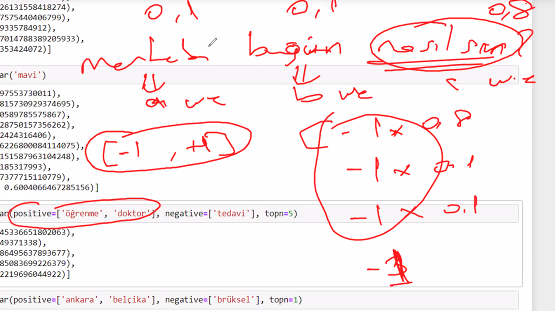

In [16]:
model.wv.most_similar(positive=['ankara', 'belçika'], negative=['brüksel'], topn=1)
# Belçikadan brükseli çıkar elimde "ülke" kalır ---> ankarayı eklersek
# .. bundan bir ülke(Danimarka) sonucu çıkarmış.
# 400.000 tane cümle ile bile yeterli öğrenememiş. Yani verimiz az aslında(ML, DL gibi değil)

# class chat soru: Hocam ankara ve belçikaya karşılık gelen vektörleri toplayıp brüksele karşılık gelen vektörü çıkardı değil mi?
# Johnson H: Aynen hocam

[('danimarka', 0.6286811828613281)]

In [17]:
model.save("word2vec.model")            # Modeli kaydetme

In [18]:
model = Word2Vec.load("word2vec.model") # Save edilen modeli çağırma

## Glove

In [ ]:
# 2. ders

In [19]:
from gensim.models import KeyedVectors

In [20]:
glove_model = 'glove.6B.100d.txt' # Hazır 6 milyar tokenle eğitilmiş(2014 teki wikipedia). Eğitim sonucunda elde edilmiş her biri 100 boyutlu embedding değerlerinden oluşuyor
model2 = KeyedVectors.load_word2vec_format(glove_model, no_header=True) #'glove.6B.100d.txt'
# glove_model in farklı varyasyonları var. Internette bulabilirsiniz bu text dosyalarına
# glove modelden elde edilmiş Word embeddingleri "word2vec" formatına çevirmemiz gerekiyor.
# KeyedVectors.load: Localimden yükle 
# .. word2vec_format : word2vec formatında (yükle)
# Not: glove_model yerine 'glove.6B.100d.txt' da yazabiliriz(Değişkene atamamız gerekmiyor illa)
# no_header=True : Eski sürümlerde bunu yapmazsak hata alırız

In [21]:
model2['teacher']
# Glove modelin önceden eğitip tespit ettiği wordembedding değerleri olduğu için çıktılar herkeste aynı olacak

array([ 0.44374 ,  0.67311 , -0.51096 ,  0.20882 , -0.10662 ,  0.55098 ,
       -0.035593,  0.25126 , -0.32789 ,  1.0762  , -0.49637 , -0.4298  ,
        0.36764 ,  0.57894 , -0.25027 , -0.41021 ,  0.086998, -0.16843 ,
       -0.85764 ,  1.0404  , -1.0314  ,  0.095147,  0.30729 ,  0.12348 ,
        0.22745 , -0.52157 , -0.72478 , -1.0843  ,  0.035966,  0.62985 ,
       -1.0991  ,  0.67161 ,  0.33797 ,  0.14551 , -0.90049 , -0.064415,
       -0.75247 ,  0.21741 ,  0.51594 , -0.46291 , -0.77598 ,  0.40705 ,
        0.1889  , -0.43402 ,  0.23202 , -0.081453, -0.3882  , -0.34444 ,
        0.080225, -0.28274 , -0.38869 , -0.58152 , -0.25558 ,  1.0027  ,
       -0.11114 , -1.5402  , -0.16761 , -0.26558 ,  0.9325  ,  0.069397,
        0.96618 ,  0.15449 , -0.22905 , -0.1761  ,  0.13225 , -0.55741 ,
        0.9234  , -0.04845 ,  0.50202 ,  1.0144  , -0.1256  ,  0.30486 ,
        0.090808,  0.17642 , -0.23146 ,  0.68386 ,  0.37269 , -0.37316 ,
       -0.025728, -1.0279  , -0.33142 ,  0.036028, 

In [22]:
model2.most_similar('ankara')
# istanbul: ikame kullanım
# moscow: komşu ülke olduğu için
# ... vs

[('turkey', 0.7512096762657166),
 ('istanbul', 0.6787630319595337),
 ('turkish', 0.6690374612808228),
 ('damascus', 0.6372509002685547),
 ('tbilisi', 0.6322181820869446),
 ('erdogan', 0.6258037090301514),
 ('moscow', 0.6217040419578552),
 ('brussels', 0.6181439161300659),
 ('skopje', 0.6164302825927734),
 ('cyprus', 0.6064029932022095)]

In [23]:
model2.most_similar('teacher')

[('student', 0.8083399534225464),
 ('school', 0.7545564770698547),
 ('teaching', 0.7521439790725708),
 ('taught', 0.741184651851654),
 ('teachers', 0.7291542887687683),
 ('graduate', 0.7134960293769836),
 ('instructor', 0.7077120542526245),
 ('students', 0.6828974485397339),
 ('teaches', 0.6552315354347229),
 ('education', 0.6528989672660828)]

In [24]:
model2.most_similar('doctor')
# Buradaki sonuçlarda görüyoruz ki daha mantıklı ilişkiler yakalanmış bu veride
# Peki bu ilişkiler başarılı mı değil mi bakalım? 

[('physician', 0.7673239707946777),
 ('nurse', 0.75215083360672),
 ('dr.', 0.7175194025039673),
 ('doctors', 0.7080884575843811),
 ('patient', 0.7074184417724609),
 ('medical', 0.6995992660522461),
 ('surgeon', 0.6905338168144226),
 ('hospital', 0.6900930404663086),
 ('psychiatrist', 0.658909797668457),
 ('dentist', 0.6447421312332153)]

In [25]:
model2.most_similar(positive=['woman', 'brother'], negative=['man'], topn=1)
# Woman ile brother ı ağırlıklandırıp topluyoruz
# Brother dan man i çıkarırsam elimde sibling(kardeş) kalır buna "woman" ilave edersek "daughter" geldi

[('daughter', 0.8917792439460754)]

In [26]:
model2.most_similar(positive=['woman', 'father'], negative=['man'], topn=1)
# Father dan man i çıkar elimizde parents(ebeveyn) geldi buna woman eklersek mother gelmiş

[('mother', 0.9024619460105896)]

In [27]:
model2.most_similar(positive=['woman', 'uncle'], negative=['man'], topn=1)

[('aunt', 0.836803138256073)]

In [28]:
model2.most_similar(positive=['ankara', 'germany'], negative=['berlin'], topn=1)
# germany den berlin i çıkar --> country(ülke) kaldı buna ankara ekle --> ülke(turkey) gelmiş

[('turkey', 0.81471186876297)]

In [29]:
model2.most_similar(positive=['teach', 'doctor'], negative=['treat'], topn=1)

[('teacher', 0.7610154151916504)]

In [30]:
model2.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
# king - man = royalty + woman = queen

[('queen', 0.7698541283607483)]

In [31]:
model2.most_similar(positive=['love', 'jealous'], negative=['hate'], topn=1)

[('lover', 0.7032662630081177)]

In [ ]:
# Sonuç olarak 400.000 tane cümle az değil ama onda aldığımız ilişkilere bakın
# Birde bu veriye bakın. Sonuçlar bu veride çok daha başarılı

## RNN MODELLER

In [ ]:
# Tokenler arasındaki anlamsal ilişkilerin kurulması
# Kalıpların tespit edilmesi vs DL modelleri ile yapılıyor
# RNN: Tekrarlayan sinir ağları
# Bir datanın içeriğinden ziyade o datanın sıralaması bizim için daha önemli ise bu tür datalarda RNN modelleri kullanıyoruz
# Datanın sıralaması? Mesela ben türkçe dilindeki tokenleri sıralı şekilde kullanarak konuşuyorum
# .. Eğer farklı kalıplar kullanarak konuşursam anlaşılmaz
# Modelin de bu grammer yapılarını anlamlandırabilmesi için sırası


# RNN de Her bir layer bir önceki layer ın çıktısına muhtaç
# Örnek: What time is it?
# Alttaki mavi RNN modelim ve bu tek bir layer
# .. Ben what tokenini veriyorum
# .. Hidden state(hafıza)(Alttaki siyah yer)
# .. t1 anında time tokenini verdiğimde what o bana geri gönderiyor(reccurent işlemi yapıyor)
#.. ve time ile what birleşti mavi yerde
# .. Eğer what ı hafızasında tutmasaydı time bir anlam ifade etmeyecekti
# Sonuç olarak bizim hafızası olan bir modele ihtiyacım var
# t2 anında "is" i veriyorum ve "what time" ı hafızada tutup ile "is" ile birleştirdi
# t3 anından "it" i verdiğim zaman
# t4 anında what time is it i birlikte gördüğü için bundan bir anlam çıkarabilir
# Bunları hafızasında tutmasaydı tokenleri tek tek değerlendirip bir anlam çıkaramayacaktı
# Yani her bir layer bir önceki layerdan gelen bilgiye mahkum derken bunu kastediyoruz


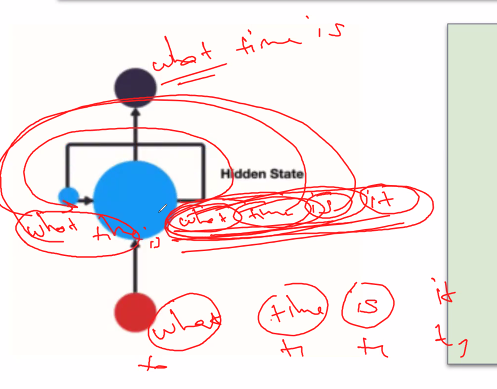

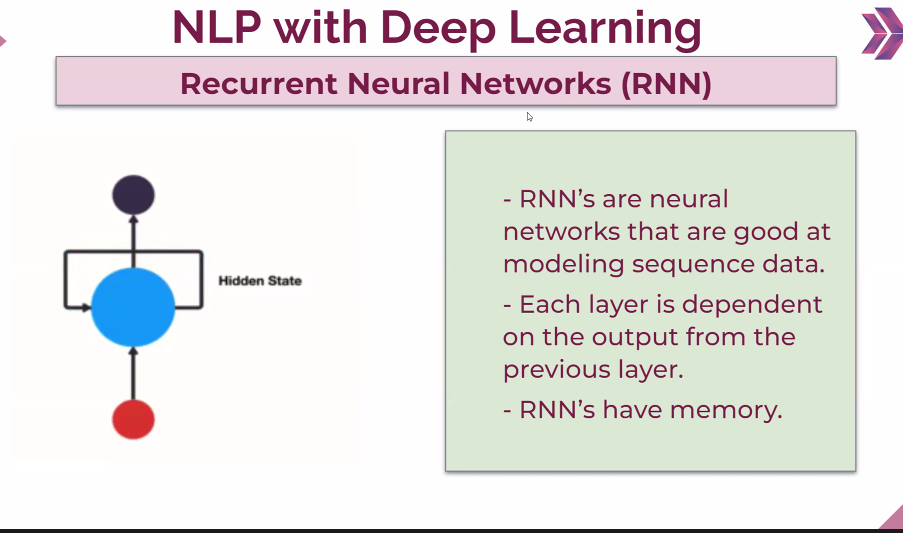

In [ ]:
# Az önceki işlemin aynısını burada da yapalım
# X0: t0 anı, X1: t1 anı ...
# h0 : what tokenini tutuyor

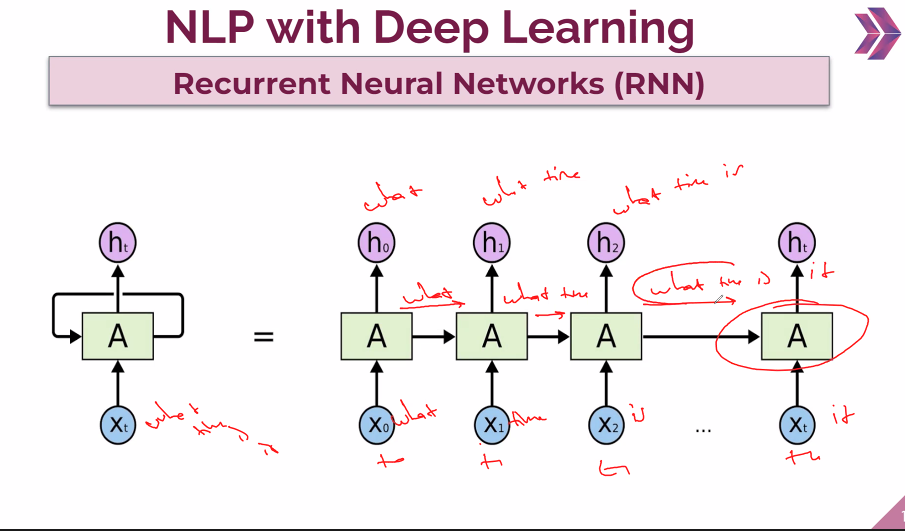

In [ ]:
# one to one: çok kullanılmaz
# one to many: bir resim veriyoruz modele, resimde ne görüyorsa onu vereceğimiz token sayısıyla anlatıyor(max 10 tokenle anlat vs)
# many to one : Birden fazla tokenden oluşan text i veriyoruz, olumlu ve ya olumsuz diye döndürür
# many to many : Translation olarak düşünebiliriz. Birden fazla tokenden oluşan text i veriyoruz Birden fazla tokenden oluşan text geliyor

# Bunların hepsini hazır modeller üzerinden göstereceğiz

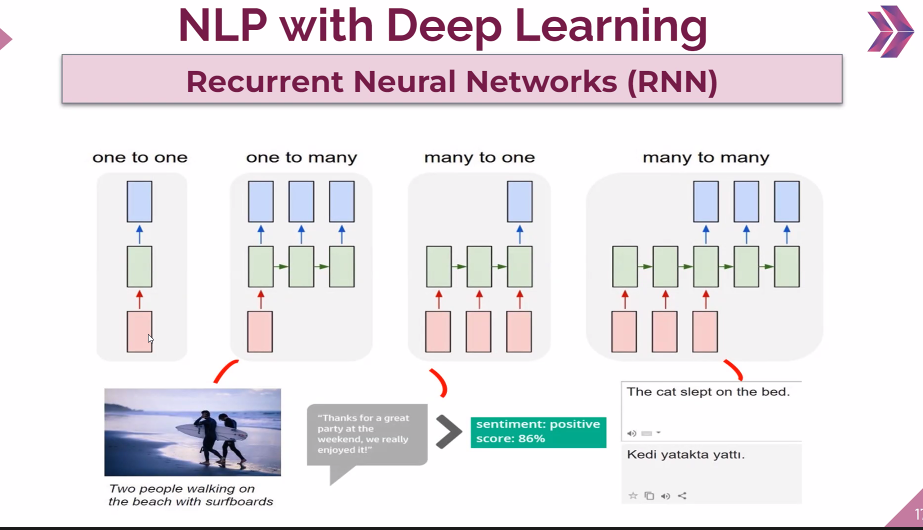

In [ ]:
# Yukarda anlattığımızı küçük görsel üzerinde gösterelim
# 10 tokenli bir cümlemizin olduğunu varsayıyoruz
# Bunların herbiri 3 boyutlu embeddingler t0,t1, ... t9
# Her bir model bir sonraki layer ı beslemeye devam ediyor
# Tanh function ın ne yaptığı anlatılacak sonra

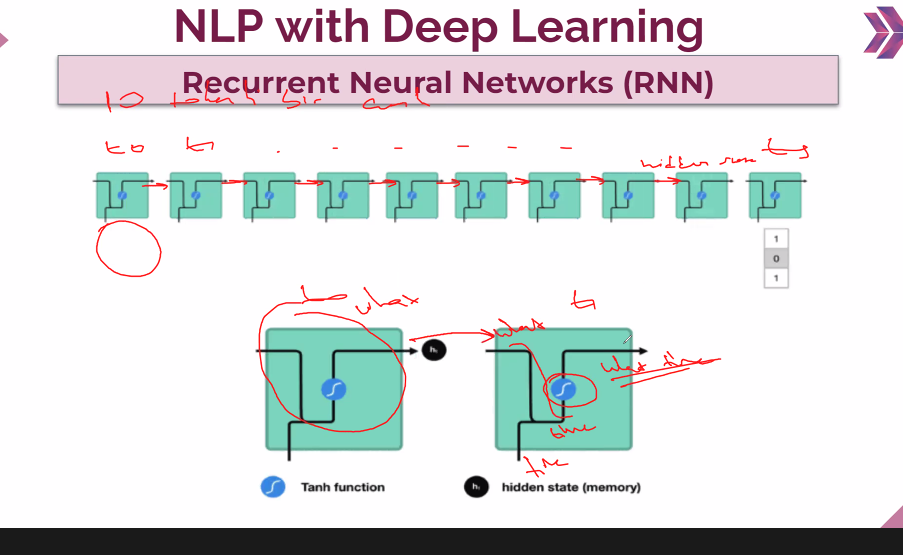

In [ ]:
# What ile time geldi sentence embedding şekinde birleşiyor ve bir aktivasyon fonksiyonuna giriyor
# .. Bu what time olarak çıkıyor sonra "is" gelecek . what time ile birleşecek
# İlk hidden state imiz 0 lardan oluşan bir word embeddingtir yani cümleye "what" ı verdiğimde "what"
# .. hala "what" olmaya devam edecek

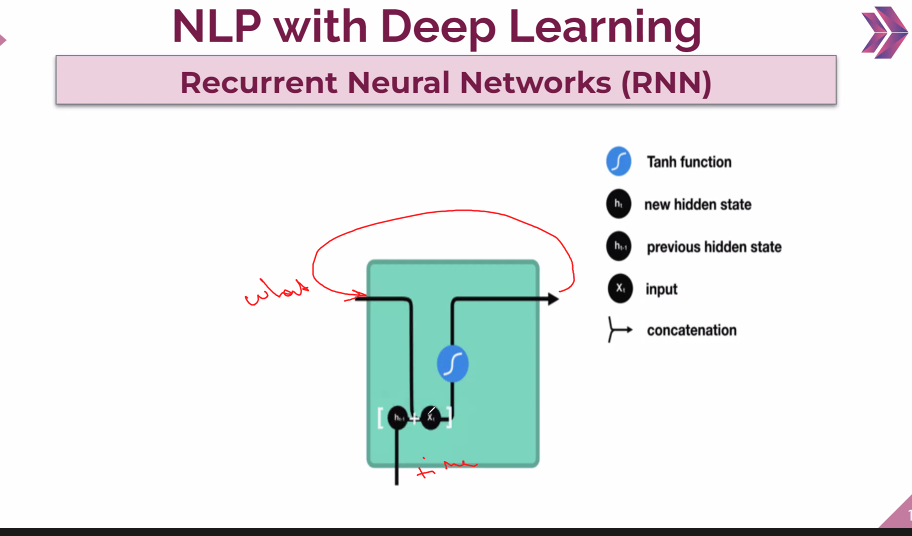

In [ ]:
# Ne için Tanh activasyonunu kullanıyoruz?
# Bir nevi scale diyebiliriz
# Modelimiz RNN modelleri içerisinde sürekli işleme tabi tutulurken katsayılarla(1 den büyük değerlerle) çarpılıyor çokça defa.(Girerken, başka bir tokenle birleşirken vs vs)
# .. değerlerimiz çok büyük değerler alıyor(-1, +1 arasında olmuyor. Bunlar -1, +1 arasında kalmalı ki anlamsal ilişkileri kurabilsin model)
# Örneğin Man tokeninin word embeddingleri beklediğimiz tarzda oluyor diyelim tanh kullanmadığım halde
# .. man = [1, 0.2, 0.3, 0.8, ...]
# man ile woman arasındaki benzerliği biz gender arasından buluyorduk ama eğer
# woman = [100, 10, 0.001, 0.003 ...] olursa değerler birbirine yakın olmadığı için(1-100 , 0.2-10, 0.3-0.001, ...) anlamsal ilişki kuramaz model
# Yani bu değerleri -1, +1 arasına sıkıştırmazsak bunlar anlamsal ilişkiler kuramazlar

# Sonuç olarak; RNN de tokenler birçok işleme tabi tutuluyor ve biz bu tokenlerin değerlerini
# .. -1,+1 arasında tutarak anlamsal ilişkileri kurmasını sağlıyoruz



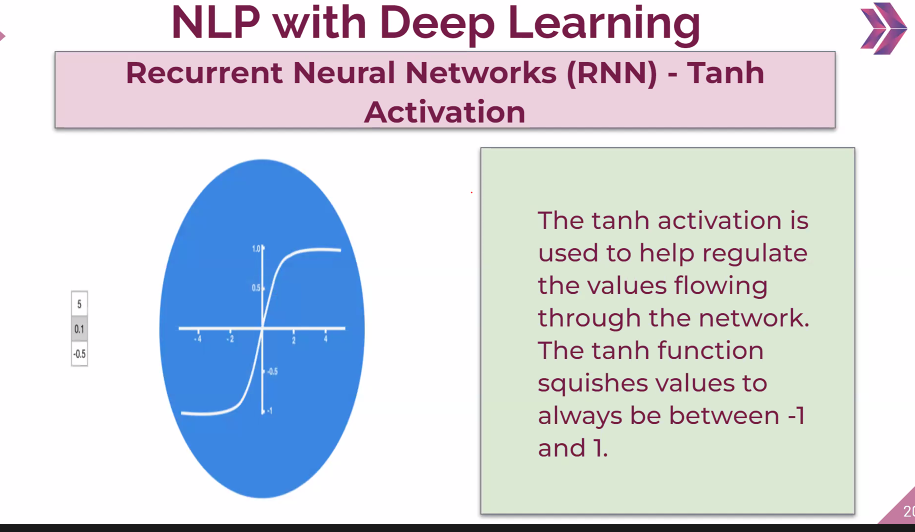

###### class chat soru: 100 boyutlu derken 100 token feature olarak kullanılıyor mu demek?
######  Johnson H: Hayır hocam. Bu değerler bir feature representation, Gender, Araç, Royalty vs vs
##### Bu feature representation ların ne olduğunu hiç bir zaman bilmiyoruz. Model bu anlamsal ilişkileri yakalıyor arka planda ancak bana bir isim vermiyor.
##### Buradan her token için benzerliği 1-2 tanesi üzerinden kuruyor
##### class chat soru: 100 feature tüm token ler için aynı mı
##### Johnson H : Evet aynı, ama hepsinin aldığı sayısal değer farklı
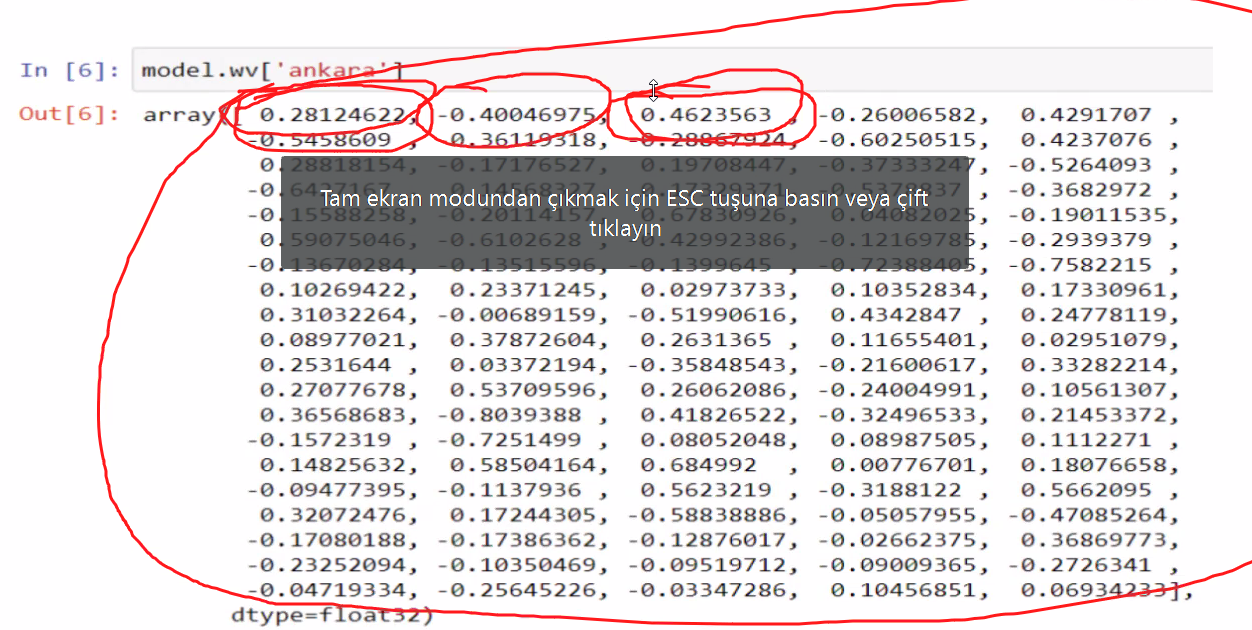

In [ ]:
# 3. ders
# Sequential Memory: Sıralı hafıza
# RNN lerin sürekli kullandığımız patternlere/grammer yapıların aşina oluyor ve sıralı hafızaya sahip oluyorlar
# .. Size desem ki alphabeyi sayın desem sıradan a dan z ye hemen sayarsınız. Z den a ya sayın desem zorlanırsınız
# .. Çünkü o yapıya aşina değilsiniz. 
# Bizim modelimizde ne kadar bu kalıplara maruz kalırsa bu yapıları tespit edip anlamlandırabiliyor
# "I met my best friend yesterday" yerine "Best yesterday I friend my met" desek hiç kimse bir şey anlayamaz

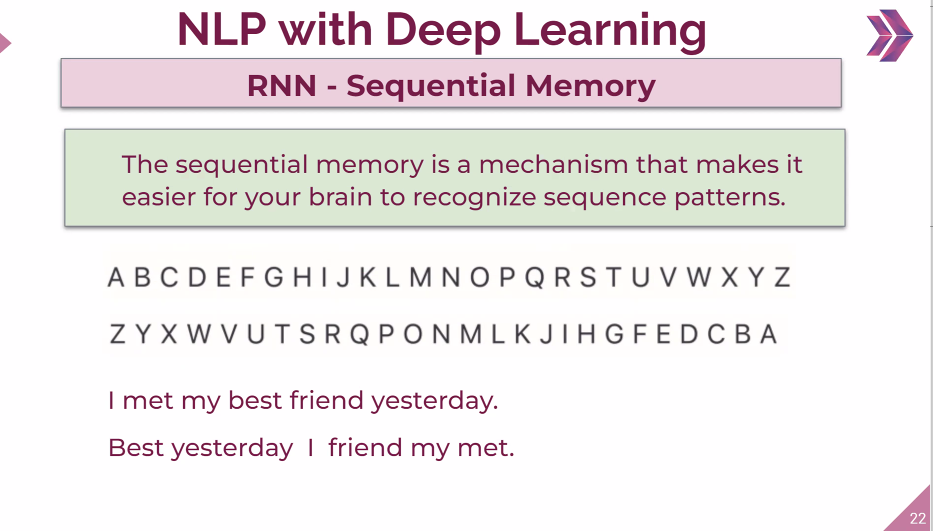

In [ ]:
# Modelim en sonunda text in bütününü anlamlandırıp, anlam çıkarıp sonuç çıkarıyor ancak
# .. her şey güllük gülistanlık değil
# Burada 2 problem var
    # 1.Sönümlenen gradient(vanishing)
    # 2.Patlayan gradient(Exploding)
# Bunlar unutma problemidir(İkiside) Not: Exploding gradient ile çok nadir karşılaşırsınız
# Siyah yeri RNN modelin hafızası olarak düşünelim. what %100 yer alıyor(%100 siyah)
# Siyah yeşil yer: What da %50 lik unutma oluyor, what ve time ile paylaşıyor
# t2 anında(O3) : "is" in hafızası daha fazla diğerleri az
# .. en sona en önemli olan "what" ve "time" tokenleri neredeyse hafızada çok az kalmış
# RNN modellerinin böyle bir sorunu var
# RNN kısa cümlelerde çok iyi sonuçlar verirken, uzun cümlelerde çuvallıyorlar.
# Bunları çözmek için yeni bir model geliştiriliyor ve unutma problemi gideriliyor(LSTM ve Gru ile)

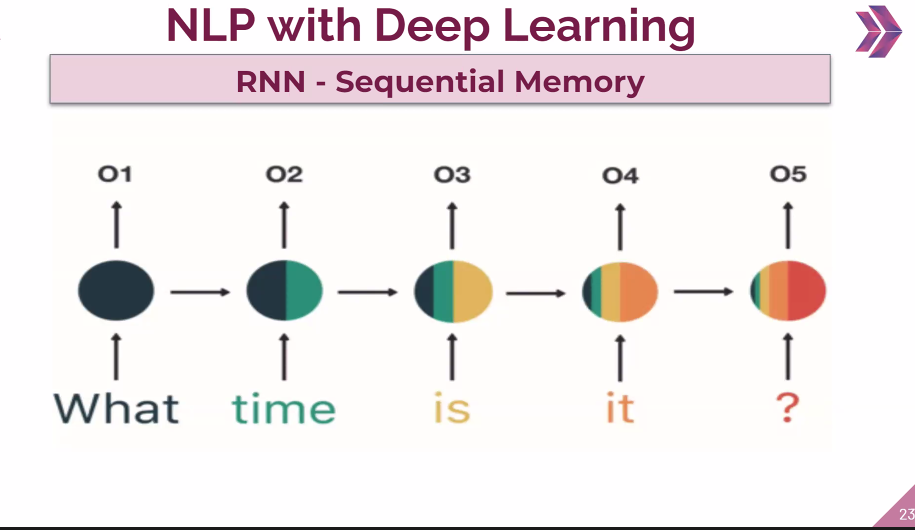

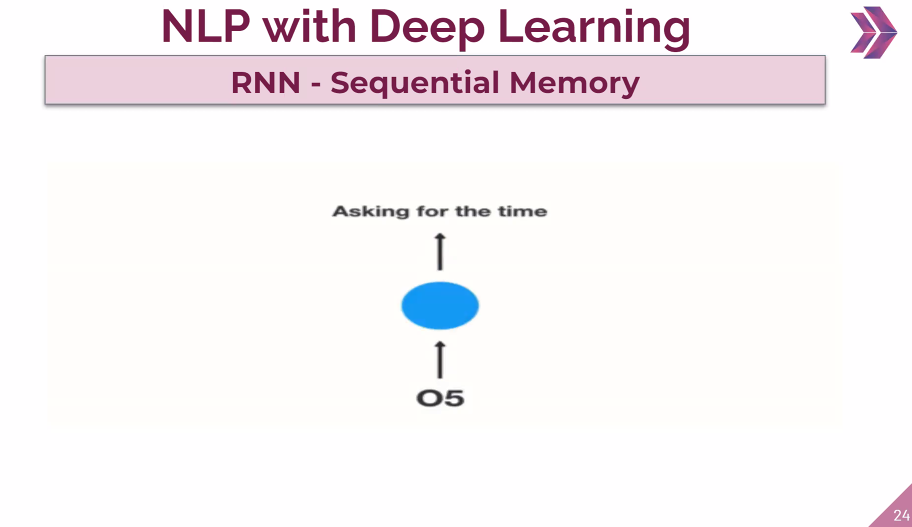

In [ ]:
# Kısa süreli hafıza vanishing gradient probleminden kaynaklanıyor(kaynaklarda böyle)
# .. ancak unutma exploding gradientden de kaynaklanır.
# Textler ilerledikçe modele en başta verilen "what" ve "time" bilgisi unutuluyor

# class chat: unutmanın başta olması bizimki gibi fiili sonda olan diller için bir avantaj olabilir mi hocam?
# Johnson H: Yorumu en başta yaparsanız sonlarda asıl konuyu unutmaya meyilli olacak
# .. Eğer yorumu sonda yaparsanız bir avantaj olabilir ama çok uzun cümlelerde yine çuvallayacaktır
# RNN modellerini hiç kullanmayacağız zaten piyasada da kullanımları yok LSTM ve GRU kullanacağız

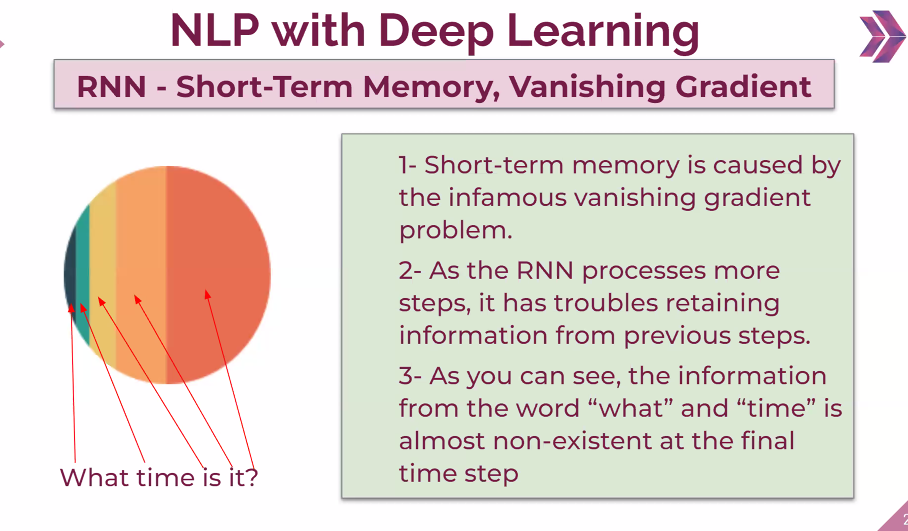

In [ ]:
# Gradient: Katsayılarda ne kadar güncelleme yapacağımıza karar verdiğimiz bir argüman
# Gradient değerimiz ne kadar büyükse,güncellemeyeler de büyük olacak yani eğim o kadar dik olacak ve
# .. adımları büyük büyük atacak
# Gradient değerimiz çok küçük olursa, eğitim neredeyse biter eğitim devam etme bile bir şey değişmeyecek
# Gradient değerim ne kadar büyük olursa backpropagation da adımlarım o kadar büyük oluyor(Learning rate le ayarlama yapabiliyorum ama
# .. learning rate çok etki etmiyor).
# Katsayıların ne kadar güncellenecek bunu ayarlıyor gradient
# Hangi feature ın katsayısı daha büyükse o katsayı daha çok güncelleniyordu
# Alta bakarsak 10. epoch da katsayım 1.01 iken 100. epoch da katsayım 1.0098 ise . Katsayım değişmezse loss değerimde değişiklik olmaz
# .. Demekki gradient değerim o kadar küçük bir değer ki eğitim devam etmesine rağmen model bir şey öğrenmiyor
# .. Bu işte vanishing gradient oluyor

# Exploding Gradient;
# Geriye doğru kısmı türevler alırken gradient değerlerimiz o kadar büyüyor ki;
# Örneğin değerim ilkinde 1. epochda katsayım 100 iken, 100. epoch da 10 üzeri 100 oluyor
# .. o kadar büyük değer geliyor ki katsayım loss değerleri "None" gelir. Bu durum exploding gradientti
# Bu durum klasik RNN modelleri kullandığınızda olur biz bunları kullanmayacağız zaten. 

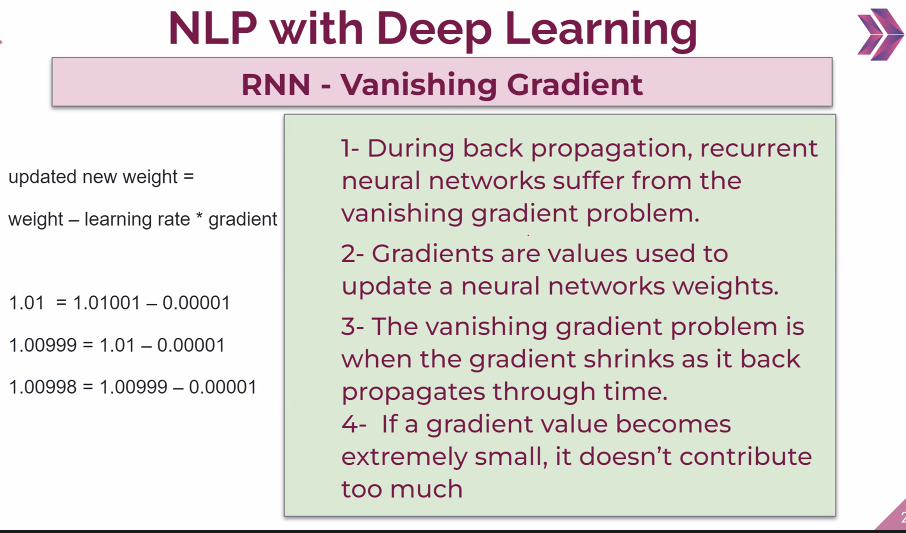

In [ ]:
# Önceki söylenen şeyler söyleniyor burada

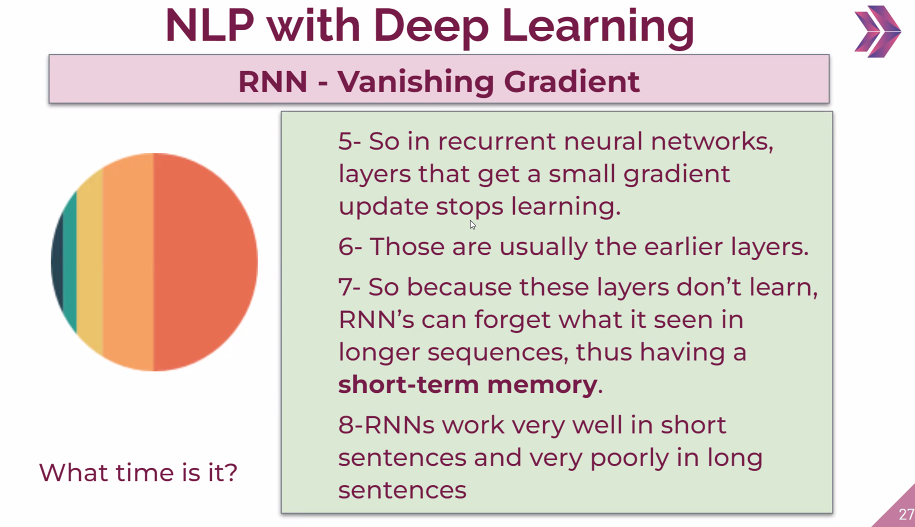

In [ ]:
# t0,t1,t2, ... anında tokenleri besliyorduk
# What time is it --
# t0,t1,t2, ... anında modele verirken hepsinin çarpıldığı katsayı aynıdır
# .. loss hesapladık diyelim. Sonra geriye doğru kısmi türev alırken;Bi sonraki slayt

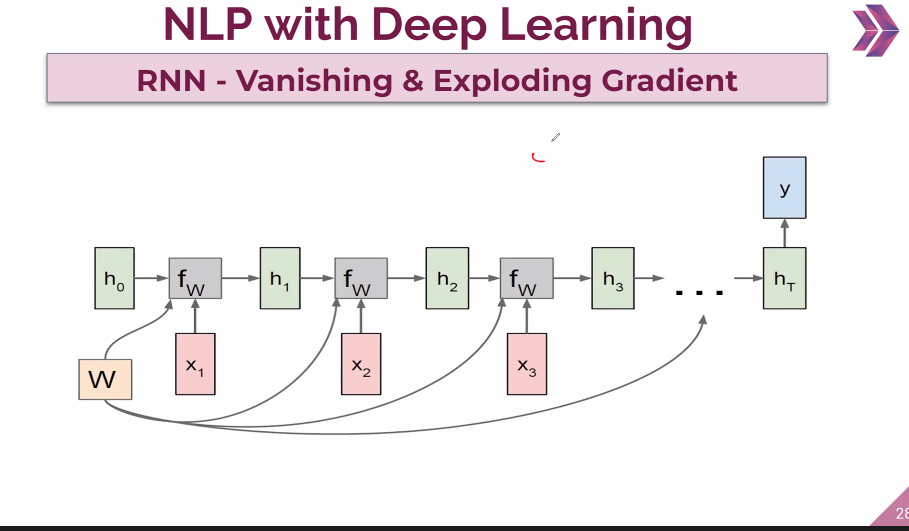

In [ ]:
# Geriye doğru türev alırken her bir aşamadaki(layerdaki) bütün katsayılar birbirleriyle çarpılır
# .. 4 token için backpropagation aşamasında katsayı w üzeri 4 değeri alacak
# Değerler 0-1 arasında bir değer olursa üzeri alındıkça 0 a yaklaşır katsayı     (Vanishing gradient)
# Değerler 1 den büyük olursa Değer artı sonsuza gider(Giderek üstel olarak büyür) (Exploding gradient)
# NOT: Kısa cümlelerde çok sorun olmaz ama uzun cümlelerde mesela 100 token olursa w üzeri 100 olacak
# .. ve türev alma aşamasında(güncelleme yaparken) sıkıntı yaşar model
# class chat örnek hesaplama: (1.2)^100 = 82.817.974,522014550258408423595737

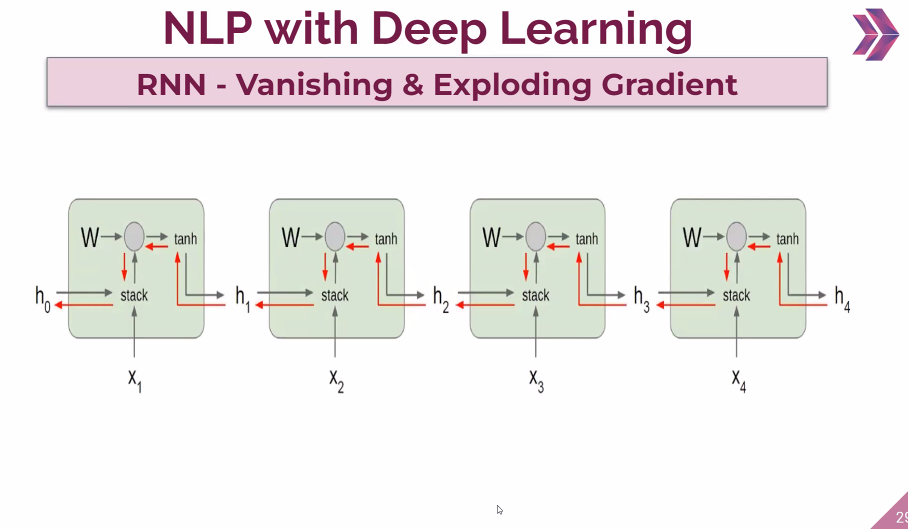

##############################################################################################

In [ ]:
# RNN modellerinde unutma problemi olduğundan LSTM modeli bulunuyor(1995-1997 arası)
# Hafıza problemini gidermek için kurulan bir model
# 3 tane kapısı var : Forget gate, input gate, output gate
# Bu kapılar sigmoid fonk. üzerinden yapılıyor
# Hidden state, RNN deki hidden state ile aynı : kısa süreli hafıza
# Cell state: hidden state ile tamamen aynı mekanizmadır: uzun süreli hafıza
# Hidden state, cümledeki bütün tokenleri hafızada tutmaya çalışır
# Cell state, modeldeki tahminleri yapmak için gerekli olan keyword leri öğrenip ayıklayıp tutuyor
# 100 tokenlik yorum için hidden da 100 token yer alırken, cell de keyworler yer alır
# Yorumu tahmin etmemdeki en yüksek/en iyi token ne ise onu tutuyor cell state.
# Keyword leri hidden state den alıp nasıl cell state e aktarıyoruz 
# .. bunları Forget gate, input gate, output gate ile yapıyoruz
# cell state e bir keyword değerinin geçmesini istiyorsam alttaki resimde kırmızı aktivasyon fonksiyonu yardımıyla
# .. wordembedding i 1 ile çarptığımız zaman uzun süreli hafızaya(cell state e) geçiyor. 0 ile çarptığımızda ihmal ediyor
# Not: Kapıların(gate) ne yaptığından bahsedeceğiz

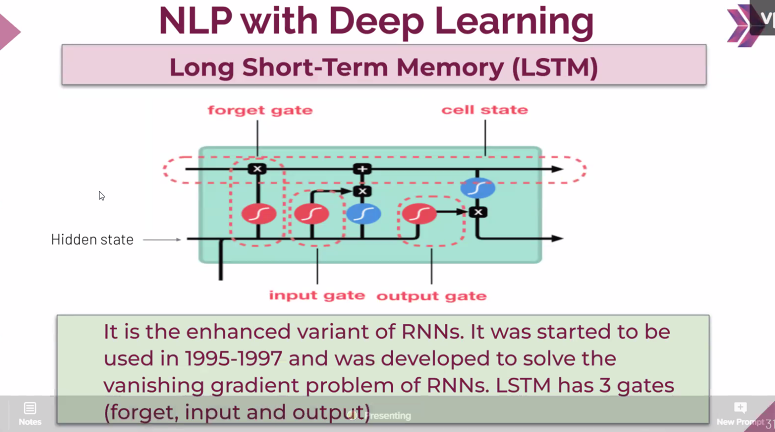

In [ ]:
# sigmoid function word embeddingleri 0 la veya 1 ile çarpılıyor

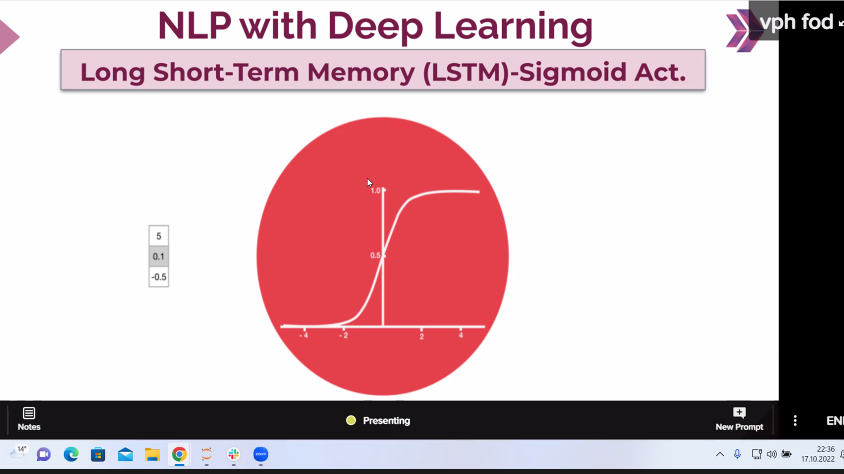

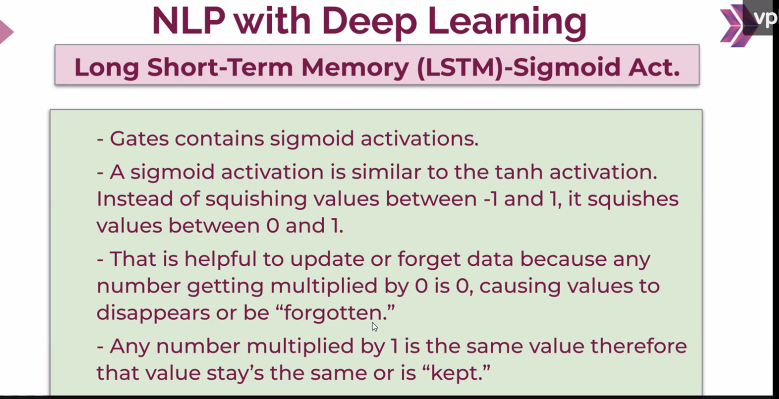

In [ ]:
# Forget Gate: Cell state de bulunan bir bilgiyi unutturur
# Örnek yorum: "Ilk aldığımda telefon müthişti ancak ilerleyen zamanlarda telefon çok kötü oldu"
# Modelim eğitimi tamamlamış. Eğitim sonrasında hangi keyword lerin olumlu ve olumsuz yorumları tespitinde önemli
# .. olduğunu biliyor diyelim
# "Ilk" kelimesini verelim.(Bu 0 lardan beslenecek(Yukarda bahsetmiştik)). Burada forget gate bir şey yapmayacak
# .. çünkü daha cell state de hiç bir şey yok
# Input gate: Bir tokenin cell state e geçip geçmeyeceğine karar veriyor(Örneğin 0 ile çarptı ve cell state e geçirtmedi diyelim)
# "aldığımda" kelimesini verelim ...... 0 la çarpıyor ..... (Forget gate hala bir şey yapmıyor)
# "telefon" kelimesi geliyor. Input gate diyorki bu bir keyword ve bunu sigmoid vasıtasıyla 1 ile çarpıyor sonra
# .. birçok katsayı ile çarpma vs olduğu için tanh den geçiriyoruz
# .. ve değerlerimizi -1 ile +1 arasında sıkıştırıyoruz. cell state e aktarıyoruz
# "müthiş" ...... "telefon" ile aynı işlem yapılıyor ve cell state e aktarıyoruz
# "ancak" .... 0 ile çarpıyor
# "ilerleyen" .... 0 ile çarpıyor
# "amanlarda"  ... 0 ile çarpıyor
# "telefon" . bir keyword geliyor forget gate bir şey yapmıyor. input gate diyorki ben de "telefon" mevcut zaten
# .. bunu 0 ile çarpıp ignore ediyor.
# "kötü" geldiğinde "müthiş" i silmesi gerekiyor ve forget gate .....................
# ...................................... en son olumsuz diyor ama-->(Arası kaçtı(Videoda TSI: 22:48(Ders sonu:22:57)))

# class chat soru: “telefon kesinlikle bu parayı hak etmiyor. yeni hiç bir özelliği yok. ancak küçük ekran sevenler için iyi bir telefon”
# .. şeklindeki bi yorumu yanlış anlamaz mı hocam bu mantıkla?
# johnson H: Yorumlarınızda böyle modelin kafasını karıştıran model varsa iyi örnekler üzerinden tahmin yapılmaya başlayacaktır
# .. ancak bu örnekler daha çok verilirse model daha iyi öğrenir. Bunu modele öğretmeniz lazım
# .. örneğin; Open AI firmasının geliştirdiği "gpt 3" modeli gibi çok detaylı bilgileri olan bir corpusunuz olursa sonuçlarınız
# .. o kadar iyi olur

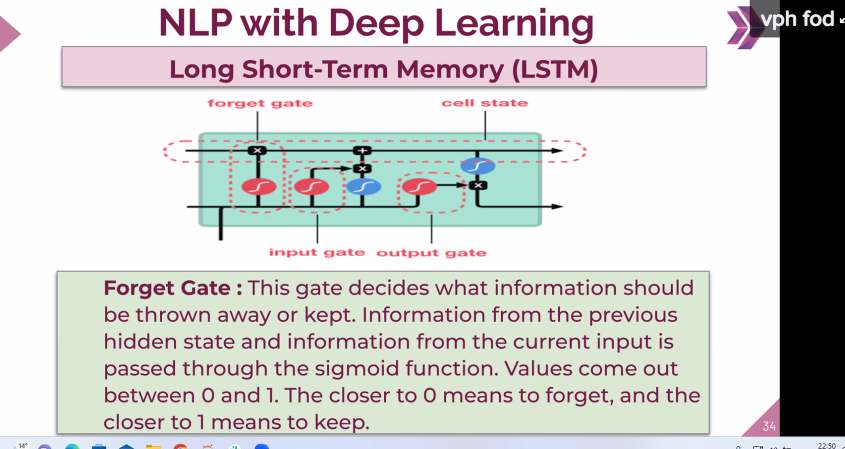